<a href="https://colab.research.google.com/github/Shubhamthorat667/react_registration/blob/main/Energy_Consumptio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/KwhConsumptionBlower78_1.csv')
print(df.head())

   Unnamed: 0      TxnDate   TxnTime  Consumption
0       76229  01 Jan 2022  16:55:52        1.010
1       76258  01 Jan 2022  21:45:29        0.908
2       76287  01 Jan 2022  12:24:52        0.926
3       76316  01 Jan 2022  04:07:36        0.928
4       76345  01 Jan 2022  06:52:25        0.916


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1228 non-null   int64  
 1   TxnDate      1228 non-null   object 
 2   TxnTime      1228 non-null   object 
 3   Consumption  1228 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 38.5+ KB


In [ ]:
df['TxnDate'] = pd.to_datetime(df['TxnDate'])
reference_date = pd.to_datetime('2022-01-01')
df['Days_Since_Reference'] = (df['TxnDate'] - reference_date).dt.days

# Now, 'Days_Since_Reference' is a numeric column (float) representing the number of days.
print(df)

      Unnamed: 0    TxnDate   TxnTime  Consumption  Days_Since_Reference
0          76229 2022-01-01  16:55:52        1.010                     0
1          76258 2022-01-01  21:45:29        0.908                     0
2          76287 2022-01-01  12:24:52        0.926                     0
3          76316 2022-01-01  04:07:36        0.928                     0
4          76345 2022-01-01  06:52:25        0.916                     0
...          ...        ...       ...          ...                   ...
1223       97922 2022-01-20  21:43:55        5.128                    19
1224       97951 2022-01-20  09:43:03        5.924                    19
1225       97980 2022-01-20  03:06:05        4.664                    19
1226       98009 2022-01-20  06:16:38        3.474                    19
1227       98038 2022-01-20  16:48:03        2.478                    19

[1228 rows x 5 columns]


In [ ]:
df['TxnTime'] = pd.to_datetime(df['TxnTime'])

# Extract hours, minutes, and seconds
df['Hour'] = df['TxnTime'].dt.hour
df['Minute'] = df['TxnTime'].dt.minute
df['Second'] = df['TxnTime'].dt.second

# Convert time values to a float representation, e.g., fractional hours since midnight
df['Time_Float'] = df['Hour'] + df['Minute'] / 60.0 + df['Second'] / 3600.0
df.drop(['Hour', 'Minute', 'Second'], axis=1, inplace=True)

print(df)

      Unnamed: 0    TxnDate             TxnTime  Consumption  \
0          76229 2022-01-01 2024-04-11 16:55:52        1.010   
1          76258 2022-01-01 2024-04-11 21:45:29        0.908   
2          76287 2022-01-01 2024-04-11 12:24:52        0.926   
3          76316 2022-01-01 2024-04-11 04:07:36        0.928   
4          76345 2022-01-01 2024-04-11 06:52:25        0.916   
...          ...        ...                 ...          ...   
1223       97922 2022-01-20 2024-04-11 21:43:55        5.128   
1224       97951 2022-01-20 2024-04-11 09:43:03        5.924   
1225       97980 2022-01-20 2024-04-11 03:06:05        4.664   
1226       98009 2022-01-20 2024-04-11 06:16:38        3.474   
1227       98038 2022-01-20 2024-04-11 16:48:03        2.478   

      Days_Since_Reference  Time_Float  
0                        0   16.931111  
1                        0   21.758056  
2                        0   12.414444  
3                        0    4.126667  
4                        0

<ipython-input-4-48844b905d1f>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TxnTime'] = pd.to_datetime(df['TxnTime'])


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# to fix the above error we have created 2 new features "Days_Since_Reference and Time_Float"
features = df[['Unnamed: 0','Days_Since_Reference','Time_Float','Consumption']]
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
pca = PCA(n_components=2)  # Choose the number of components you want to keep
principal_components = pca.fit_transform(scaled_features)

# Step 7: Interpret Results
explained_variance = pca.explained_variance_ratio_
print (df)

      Unnamed: 0    TxnDate             TxnTime  Consumption  \
0          76229 2022-01-01 2024-04-11 16:55:52        1.010   
1          76258 2022-01-01 2024-04-11 21:45:29        0.908   
2          76287 2022-01-01 2024-04-11 12:24:52        0.926   
3          76316 2022-01-01 2024-04-11 04:07:36        0.928   
4          76345 2022-01-01 2024-04-11 06:52:25        0.916   
...          ...        ...                 ...          ...   
1223       97922 2022-01-20 2024-04-11 21:43:55        5.128   
1224       97951 2022-01-20 2024-04-11 09:43:03        5.924   
1225       97980 2022-01-20 2024-04-11 03:06:05        4.664   
1226       98009 2022-01-20 2024-04-11 06:16:38        3.474   
1227       98038 2022-01-20 2024-04-11 16:48:03        2.478   

      Days_Since_Reference  Time_Float  
0                        0   16.931111  
1                        0   21.758056  
2                        0   12.414444  
3                        0    4.126667  
4                        0

In [ ]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.41457699 0.34903876]


In [ ]:
component_loadings = pca.components_
print(component_loadings)

[[ 0.71094897  0.69979326  0.01089034  0.06871941]
 [ 0.03211484 -0.11313399  0.694555    0.70976242]]


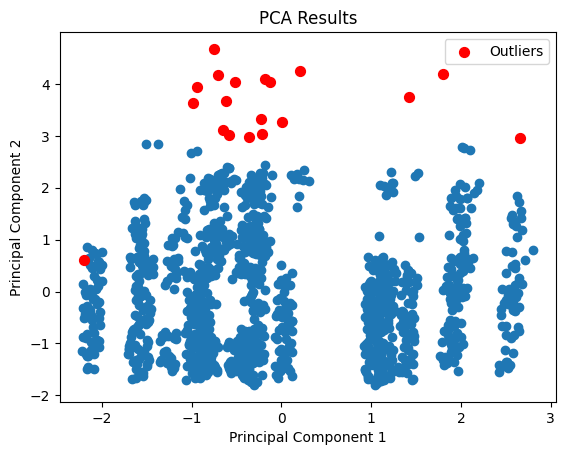

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
z_scores = np.abs(stats.zscore(principal_components))
threshold = 2.5

outliers = np.where(z_scores > threshold)
outlier_indices = list(set(outliers[0]) | set(outliers[1]))  # Combine row and column outliers

# Highlight outliers on the scatterplot
plt.scatter(principal_components[outlier_indices, 0], principal_components[outlier_indices, 1], c='red', s=50, label='Outliers')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you have already applied PCA as shown in your code and have 'principal_components'
# Also, make sure 'df' contains your original data before PCA.

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Unnamed: 0', 'Days_Since_Reference', 'Time_Float', 'Consumption']])

# Create a PCA object with the number of components you used originally
n_components = 2  # Replace with the number of components you used
pca = PCA(n_components=n_components)

# Fit the PCA model on the scaled data
pca.fit(scaled_features)

# Reconstruct the data points from the PCA components
reconstructed_data = pca.inverse_transform(principal_components)

# Create a DataFrame with the reconstructed data
reconstructed_df = pd.DataFrame(data=reconstructed_data, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4'])

# Concatenate the 'Unnamed: 0' column if you want it in the reconstructed DataFrame
reconstructed_df['Unnamed: 0'] = df['Unnamed: 0']

# Display the reconstructed DataFrame
print(reconstructed_df)

      Feature1  Feature2  Feature3  Feature4  Unnamed: 0
0    -1.563279 -1.561054  0.083007 -0.042210       76229
1    -1.542076 -1.607265  0.404988  0.287333       76258
2    -1.579883 -1.509476 -0.242937 -0.375416       76287
3    -1.613437 -1.422352 -0.819583 -0.965245       76316
4    -1.599428 -1.448086 -0.629855 -0.770939       76345
...        ...       ...       ...       ...         ...
1223  1.946051  1.742615  0.858879  1.032217       97922
1224  1.912436  1.860660  0.133673  0.291126       97951
1225  1.860546  1.942169 -0.502876 -0.361181       97980
1226  1.852532  1.922779 -0.447850 -0.305806       98009
1227  1.880311  1.826388  0.145891  0.300961       98038

[1228 rows x 5 columns]


In [ ]:
from scipy import stats

# Calculate z-scores for the reconstructed data
z_scores_reconstructed = np.abs(stats.zscore(reconstructed_data))
threshold = 2.5  # Set your desired threshold for anomaly detection

# Find outlier indices based on the threshold
outliers_reconstructed = np.where(z_scores_reconstructed > threshold)
outlier_indices_reconstructed = list(set(outliers_reconstructed[0]) | set(outliers_reconstructed[1]))  # Combine row and column outliers

# Display the indices of anomalies in the reconstructed data
print("Anomaly Indices in Reconstructed Data:", outlier_indices_reconstructed)

Anomaly Indices in Reconstructed Data: [193, 2, 3, 1030, 651, 1169, 82, 84, 89, 799, 1056, 290, 312, 423, 359, 489, 364, 240, 242, 311, 568]


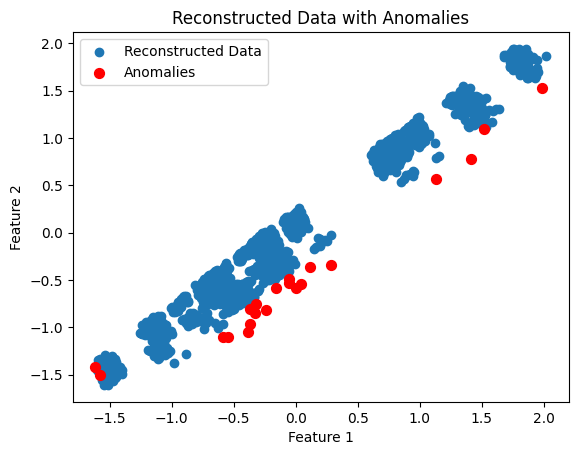

In [ ]:
import matplotlib.pyplot as plt

# Scatterplot of the reconstructed data
plt.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], label='Reconstructed Data')

# Highlight anomalies in red
plt.scatter(reconstructed_data[outlier_indices_reconstructed, 0], reconstructed_data[outlier_indices_reconstructed, 1], c='red', s=50, label='Anomalies')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Reconstructed Data with Anomalies')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Load the time-series data into a DataFrame
df = pd.read_csv('/content/KwhConsumptionBlower78_1.csv')

# Display the first few rows of the DataFrame to understand its structure
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Handle missing values if any
# For example, you can fill missing values with a specific value or interpolate them
# Combine 'TxnDate' and 'TxnTime' into a single timestamp column
df['timestamp'] = pd.to_datetime(df['TxnDate'] + ' ' + df['TxnTime'])

# Drop the individual 'TxnDate' and 'TxnTime' columns if they are no longer needed
df.drop(['TxnDate', 'TxnTime'], axis=1, inplace=True)

# Verify the changes
print(df.head())



   Unnamed: 0      TxnDate   TxnTime  Consumption
0       76229  01 Jan 2022  16:55:52        1.010
1       76258  01 Jan 2022  21:45:29        0.908
2       76287  01 Jan 2022  12:24:52        0.926
3       76316  01 Jan 2022  04:07:36        0.928
4       76345  01 Jan 2022  06:52:25        0.916
Unnamed: 0     0
TxnDate        0
TxnTime        0
Consumption    0
dtype: int64
   Unnamed: 0  Consumption           timestamp
0       76229        1.010 2022-01-01 16:55:52
1       76258        0.908 2022-01-01 21:45:29
2       76287        0.926 2022-01-01 12:24:52
3       76316        0.928 2022-01-01 04:07:36
4       76345        0.916 2022-01-01 06:52:25


In [ ]:
# Convert 'timestamp' column to datetime dtype
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set 'timestamp' column as the index
df.set_index('timestamp', inplace=True)

# Verify the changes
print(df.head())
print(df.info())


                     Unnamed: 0  Consumption
timestamp                                   
2022-01-01 16:55:52       76229        1.010
2022-01-01 21:45:29       76258        0.908
2022-01-01 12:24:52       76287        0.926
2022-01-01 04:07:36       76316        0.928
2022-01-01 06:52:25       76345        0.916
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1228 entries, 2022-01-01 16:55:52 to 2022-01-20 16:48:03
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1228 non-null   int64  
 1   Consumption  1228 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 28.8 KB
None


Anomaly Indices in Reconstructed Data: [193, 2, 3, 1030, 651, 1169, 82, 84, 89, 799, 1056, 290, 312, 423, 359, 489, 364, 240, 242, 311, 568]


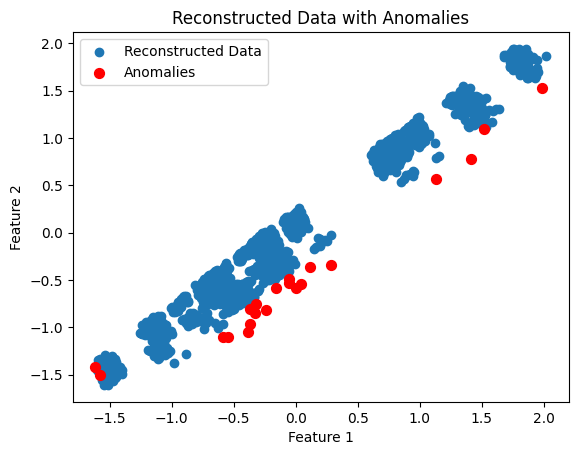

In [ ]:
from scipy import stats

# Calculate z-scores for the reconstructed data
z_scores_reconstructed = np.abs(stats.zscore(reconstructed_data))
threshold = 2.5  # Set your desired threshold for anomaly detection

# Find outlier indices based on the threshold
outliers_reconstructed = np.where(z_scores_reconstructed > threshold)
outlier_indices_reconstructed = list(set(outliers_reconstructed[0]) | set(outliers_reconstructed[1]))  # Combine row and column outliers

# Display the indices of anomalies in the reconstructed data
print("Anomaly Indices in Reconstructed Data:", outlier_indices_reconstructed)

# Scatterplot of the reconstructed data
plt.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], label='Reconstructed Data')

# Highlight anomalies in red
plt.scatter(reconstructed_data[outlier_indices_reconstructed, 0], reconstructed_data[outlier_indices_reconstructed, 1], c='red', s=50, label='Anomalies')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Reconstructed Data with Anomalies')
plt.legend()
plt.show()


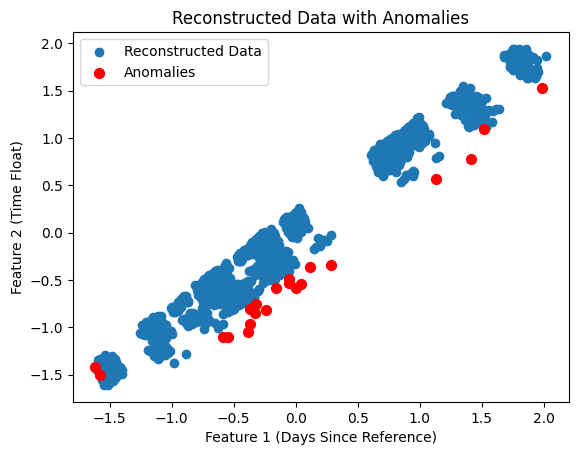

In [ ]:
# Scatterplot of the reconstructed data
plt.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], label='Reconstructed Data')

# Highlight anomalies in red
plt.scatter(reconstructed_data[outlier_indices_reconstructed, 0], reconstructed_data[outlier_indices_reconstructed, 1], c='red', s=50, label='Anomalies')

plt.xlabel('Feature 1 (Days Since Reference)')
plt.ylabel('Feature 2 (Time Float)')
plt.title('Reconstructed Data with Anomalies')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df' and the unnamed column is the first one
# You can assign it a name like 'DeviceID' using the rename function
df = df.rename(columns={df.columns[0]: 'DeviceID'})

# Display the updated DataFrame
print(df)


      DeviceID      TxnDate   TxnTime  Consumption
0        76229  01 Jan 2022  16:55:52        1.010
1        76258  01 Jan 2022  21:45:29        0.908
2        76287  01 Jan 2022  12:24:52        0.926
3        76316  01 Jan 2022  04:07:36        0.928
4        76345  01 Jan 2022  06:52:25        0.916
...        ...          ...       ...          ...
1223     97922  20 Jan 2022  21:43:55        5.128
1224     97951  20 Jan 2022  09:43:03        5.924
1225     97980  20 Jan 2022  03:06:05        4.664
1226     98009  20 Jan 2022  06:16:38        3.474
1227     98038  20 Jan 2022  16:48:03        2.478

[1228 rows x 4 columns]


In [59]:
# more colors are present quite confusing


# import matplotlib.pyplot as plt

# # Compute the maximum usage of each device
# max_usages = df.groupby('DeviceID')['Consumption'].max()

# # Plot maximum usage of each device
# for device_id, max_usage in max_usages.items():
#     device_data = df[df['DeviceID'] == device_id]
#     plt.scatter(device_data.index, [max_usage] * len(device_data), label=f'Device {device_id}')

# # Set minimum and maximum energy usage marklines for the entire dataset
# min_energy = df['Consumption'].min()
# max_energy = df['Consumption'].max()
# plt.axhline(min_energy, color='r', linestyle='--', label='Minimum Energy Usage (All Devices)')
# plt.axhline(max_energy, color='g', linestyle='--', label='Maximum Energy Usage (All Devices)')

# # Label axes and add legend
# plt.xlabel('Timestamp')
# plt.ylabel('Energy Consumption')
# plt.title('Maximum Energy Consumption of Each Device Over Time')
# plt.legend()

# # Show plot
# plt.show()


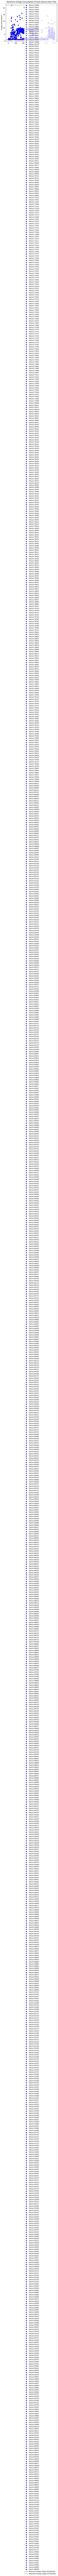

In [ ]:
import matplotlib.pyplot as plt

# Compute the maximum usage of each device
max_usages = df.groupby('DeviceID')['Consumption'].max()

# Plot maximum usage of each device
for device_id, max_usage in max_usages.items():
    device_data = df[df['DeviceID'] == device_id]
    if max_usage == max_energy:
        plt.scatter(device_data.index, [max_usage] * len(device_data), label=f'Device {device_id}', color='red', marker='^')
    else:
        plt.scatter(device_data.index, [max_usage] * len(device_data), label=f'Device {device_id}', color='blue')

# Set minimum and maximum energy usage marklines for the entire dataset
min_energy = df['Consumption'].min()
max_energy = df['Consumption'].max()
plt.axhline(min_energy, color='r', linestyle='--', label='Minimum Energy Usage (All Devices)')
plt.axhline(max_energy, color='g', linestyle='--', label='Maximum Energy Usage (All Devices)')

# Label axes and add legend
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.title('Maximum Energy Consumption of Each Device Over Time')
plt.legend()

# Show plot
plt.show()


In [57]:
# //Showing with sliding label color



# import matplotlib.pyplot as plt

# # Define color ranges for different energy consumption levels
# color_ranges = {
#     (0, 5): 'blue',
#     (6, 10): 'green',
#     (11, 15): 'orange',
#     (16, float('inf')): 'red'
# }

# # Compute the maximum usage of each device
# max_usages = df.groupby('DeviceID')['Consumption'].max()

# # Plot maximum usage of each device
# for device_id, max_usage in max_usages.items():
#     device_data = df[df['DeviceID'] == device_id]
#     for (start, end), color in color_ranges.items():
#         if start <= max_usage < end:
#             plt.scatter(device_data.index, [max_usage] * len(device_data), label=f'Device {device_id}', color=color)
#             break  # Stop once the color range is found

# # Set minimum and maximum energy usage marklines for the entire dataset
# min_energy = df['Consumption'].min()
# max_energy = df['Consumption'].max()
# plt.axhline(min_energy, color='r', linestyle='--', label='Minimum Energy Usage (All Devices)')
# plt.axhline(max_energy, color='g', linestyle='--', label='Maximum Energy Usage (All Devices)')

# # Add legend with color labels
# handles = []
# for (start, end), color in color_ranges.items():
#     handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'{start}-{end}'))

# # Add device IDs to the legend
# for device_id, max_usage in max_usages.items():
#     plt.scatter([], [], label=f'Device {device_id}', color='white')  # Dummy scatter plot for device ID
# legend1 = plt.legend(handles=handles, title='Energy Consumption Range')
# plt.legend(title='Device IDs', loc='upper left', bbox_to_anchor=(1, 1))
# plt.gca().add_artist(legend1)

# # Label axes
# plt.xlabel('Timestamp')
# plt.ylabel('Energy Consumption')
# plt.title('Maximum Energy Consumption of Each Device Over Time')

# # Show plot
# plt.show()


Blue devices: 73596, 73625, 73654, 73683, 73712, 73741, 73770, 73799, 73828, 73857, 73886, 73915, 73944, 73973, 74002, 74031, 74060, 74089, 74118, 74147, 74176, 74205, 74234, 74263, 74292, 74321, 74350, 74379, 74408, 74437, 74466, 74495, 74524, 74535, 74564, 74593, 74640, 74669, 74698, 74727, 74756, 74785, 74814, 74843, 74872, 74901, 74930, 74959, 74988, 75017, 75046, 75075, 75104, 75133, 75162, 75191, 75220, 75249, 75278, 75307, 75336, 75365, 76229, 76258, 76287, 76316, 76345, 76374, 76403, 76432, 76461, 76490, 76512, 76548, 76577, 76606, 76635, 76664, 76693, 76722, 76751, 76780, 76809, 76838, 76867, 76896, 76925, 76954, 76983, 77012, 77041, 77070, 77099, 77128, 77143, 77157, 77172, 77186, 77201, 77215, 77233, 77244, 77273, 77283, 77289, 77302, 77312, 77317, 77331, 77341, 77346, 77347, 77360, 77375, 77376, 77389, 77404, 77405, 77418, 77433, 77434, 77447, 77462, 77463, 77476, 77492, 77505, 77520, 77521, 77534, 77549, 77550, 77563, 77578, 77592, 77621, 77629, 77650, 77665, 77679, 77687,

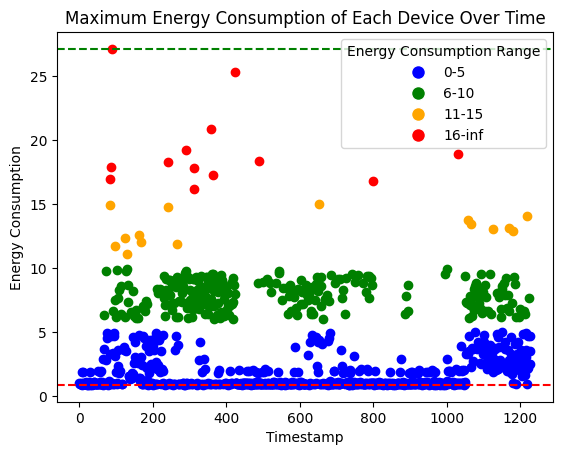

In [53]:
import matplotlib.pyplot as plt

# Define color ranges for different energy consumption levels
color_ranges = {
    (0, 5): 'blue',
    (6, 10): 'green',
    (11, 15): 'orange',
    (16, float('inf')): 'red'
}

# Compute the maximum usage of each device
max_usages = df.groupby('DeviceID')['Consumption'].max()

# Group device IDs by their corresponding color
device_ids_by_color = {color: [] for color in color_ranges.values()}

# Group device IDs by their maximum usage
for device_id, max_usage in max_usages.items():
    for (start, end), color in color_ranges.items():
        if start <= max_usage < end:
            device_ids_by_color[color].append(device_id)
            break

# Print device IDs by color
for color, device_ids in device_ids_by_color.items():
    print(f'{color.capitalize()} devices: {", ".join(str(device_id) for device_id in device_ids)}')

# Plot maximum usage of each device
for device_id, max_usage in max_usages.items():
    device_data = df[df['DeviceID'] == device_id]
    for (start, end), color in color_ranges.items():
        if start <= max_usage < end:
            plt.scatter(device_data.index, [max_usage] * len(device_data), label=f'Device {device_id}', color=color)
            break  # Stop once the color range is found

# Set minimum and maximum energy usage marklines for the entire dataset
min_energy = df['Consumption'].min()
max_energy = df['Consumption'].max()
plt.axhline(min_energy, color='r', linestyle='--', label='Minimum Energy Usage (All Devices)')
plt.axhline(max_energy, color='g', linestyle='--', label='Maximum Energy Usage (All Devices)')

# Add legend with color labels
handles = []
for (start, end), color in color_ranges.items():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'{start}-{end}'))
plt.legend(handles=handles, title='Energy Consumption Range')

# Label axes
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.title('Maximum Energy Consumption of Each Device Over Time')

# Show plot
plt.show()


SelectionSlider(continuous_update=False, description='Device ID:', options=(76229, 76258, 76287, 76316, 76345,…

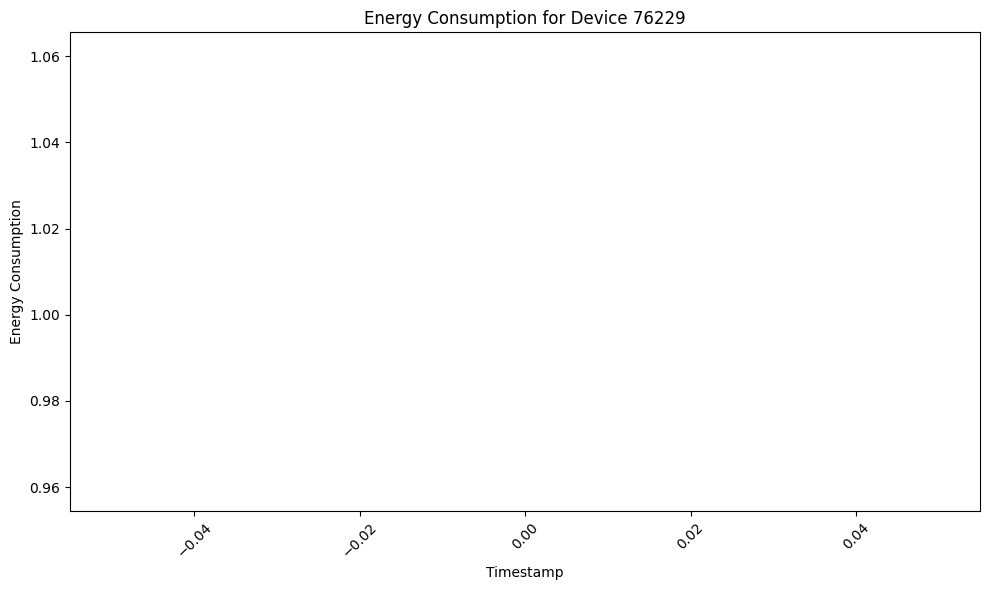

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Assuming df is your DataFrame containing the energy consumption data

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Function to update the plot based on selected device ID
def update_plot(device_id):
    ax.clear()  # Clear previous plot
    device_data = df[df['DeviceID'] == device_id]
    ax.plot(device_data.index, device_data['Consumption'])
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Energy Consumption')
    ax.set_title(f'Energy Consumption for Device {device_id}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Get unique device IDs
device_ids = df['DeviceID'].unique()

# Create a slider widget
device_slider = widgets.SelectionSlider(
    options=device_ids,
    value=device_ids[0],
    description='Device ID:',
    continuous_update=False
)

# Connect the slider widget to the update_plot function
widgets.interactive(update_plot, device_id=device_slider)

# Display the slider
display(device_slider)

# Show the initial plot
update_plot(device_ids[0])


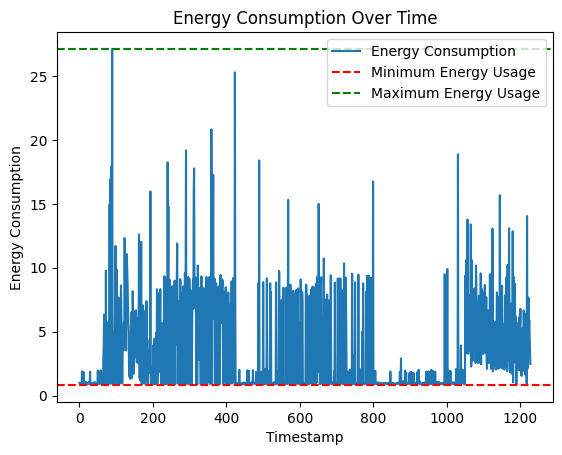

In [ ]:
import matplotlib.pyplot as plt

# Plot energy consumption
plt.plot(df.index, df['Consumption'], label='Energy Consumption')

# Set minimum and maximum energy usage marklines
min_energy = df['Consumption'].min()
max_energy = df['Consumption'].max()
plt.axhline(min_energy, color='r', linestyle='--', label='Minimum Energy Usage')
plt.axhline(max_energy, color='g', linestyle='--', label='Maximum Energy Usage')

# Label axes and add legend
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Over Time')
plt.legend()

# Show plot
plt.show()


**LSTM Based model**

Epoch 1/50
28/28 [==============================] - 4s 28ms/step - loss: 0.0222 - val_loss: 0.0036
Epoch 2/50
28/28 [==============================] - 0s 14ms/step - loss: 0.0194 - val_loss: 0.0033
Epoch 3/50
28/28 [==============================] - 1s 23ms/step - loss: 0.0181 - val_loss: 0.0015
Epoch 4/50
28/28 [==============================] - 1s 23ms/step - loss: 0.0178 - val_loss: 8.1020e-04
Epoch 5/50
28/28 [==============================] - 1s 24ms/step - loss: 0.0176 - val_loss: 4.0301e-04
Epoch 6/50
28/28 [==============================] - 1s 26ms/step - loss: 0.0175 - val_loss: 4.4189e-04
Epoch 7/50
28/28 [==============================] - 0s 16ms/step - loss: 0.0175 - val_loss: 3.3624e-04
Epoch 8/50
28/28 [==============================] - 0s 14ms/step - loss: 0.0174 - val_loss: 3.0355e-04
Epoch 9/50
28/28 [==============================] - 0s 13ms/step - loss: 0.0173 - val_loss: 2.5617e-04
Epoch 10/50
28/28 [==============================] - 0s 15ms/step - loss: 0.0173 - va

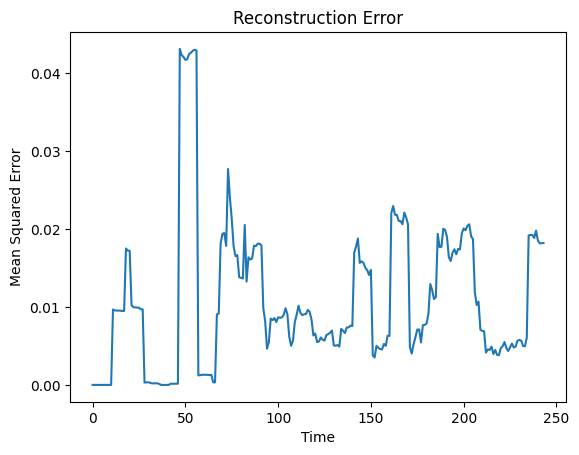

In [73]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming df is your DataFrame containing the energy consumption data

# Preprocessing: scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Consumption'].values.reshape(-1, 1))

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Set sequence length for LSTM
sequence_length = 10

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# Define LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, shuffle=False)

# Predict on the test set
predicted_values = model.predict(X_test)

# Reshape predicted_values to match the shape of X_test
predicted_values_reshaped = np.expand_dims(predicted_values, axis=-1)

# Calculate reconstruction error
mse = np.mean(np.power(X_test - predicted_values_reshaped, 2), axis=1)

# Plot the reconstruction error
plt.plot(mse)
plt.xlabel('Time')
plt.ylabel('Mean Squared Error')
plt.title('Reconstruction Error')
plt.show()


Epoch 1/50
28/28 [==============================] - 6s 44ms/step - loss: 0.0233 - val_loss: 0.0052
Epoch 2/50
28/28 [==============================] - 1s 18ms/step - loss: 0.0193 - val_loss: 0.0036
Epoch 3/50
28/28 [==============================] - 0s 17ms/step - loss: 0.0185 - val_loss: 0.0021
Epoch 4/50
28/28 [==============================] - 1s 19ms/step - loss: 0.0178 - val_loss: 7.3156e-04
Epoch 5/50
28/28 [==============================] - 0s 16ms/step - loss: 0.0175 - val_loss: 4.5477e-04
Epoch 6/50
28/28 [==============================] - 0s 14ms/step - loss: 0.0173 - val_loss: 3.5491e-04
Epoch 7/50
28/28 [==============================] - 0s 15ms/step - loss: 0.0172 - val_loss: 2.5627e-04
Epoch 8/50
28/28 [==============================] - 0s 15ms/step - loss: 0.0172 - val_loss: 2.6103e-04
Epoch 9/50
28/28 [==============================] - 0s 15ms/step - loss: 0.0172 - val_loss: 2.1548e-04
Epoch 10/50
28/28 [==============================] - 1s 18ms/step - loss: 0.0171 - va

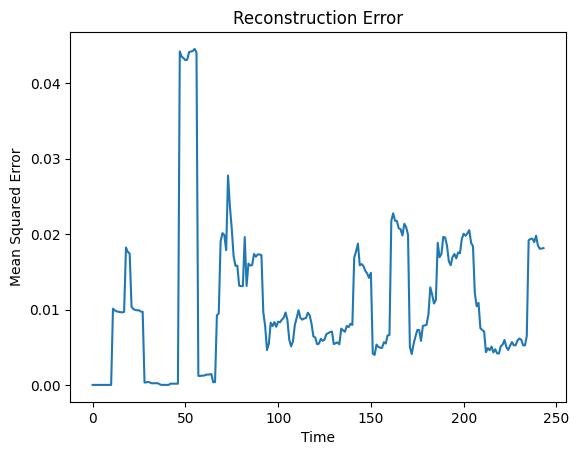

Reconstruction Error: 0.018142544921806416


In [75]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the energy consumption data

# Preprocessing: scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Consumption'].values.reshape(-1, 1))

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Set sequence length for LSTM
sequence_length = 10

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# Define LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, shuffle=False)

# Predict on the test set
predicted_values = model.predict(X_test)

# Reshape predicted_values to match the shape of X_test
predicted_values_reshaped = np.expand_dims(predicted_values, axis=-1)

# Calculate reconstruction error
mse = np.mean(np.power(X_test - predicted_values_reshaped, 2), axis=1)

# Plot the reconstruction error
plt.plot(mse)
plt.xlabel('Time')
plt.ylabel('Mean Squared Error')
plt.title('Reconstruction Error')
plt.show()

# Print reconstruction error value with unit
print("Reconstruction Error:", mse[-1][0])



In [77]:
# Assume model is the trained LSTM model and X_test, y_test are the test data
# Make predictions on the test data
predicted_values = model.predict(X_test)

# Calculate accuracy
from sklearn.metrics import mean_squared_error

# Flatten the predicted and actual values for comparison
predicted_values_flat = predicted_values.flatten()
y_test_flat = y_test.flatten()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_flat, predicted_values_flat)

# Calculate Accuracy
accuracy = 1 - mse
print("Accuracy:", accuracy)


8/8 [==============================] - 0s 6ms/step
Accuracy: 0.9867936555277339


In [81]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector

# Sample input data (you can replace this with your manual input)
# Assuming each input sequence has 10 time steps and 3 features
input_data = np.random.rand(1, 10, 3)

# Define the LSTM autoencoder model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(10, 3), return_sequences=True),
    LSTM(32, activation='relu', return_sequences=False),
    RepeatVector(10),  # Repeat the output vector 10 times
    LSTM(32, activation='relu', return_sequences=True),
    LSTM(64, activation='relu', return_sequences=True),
    Dense(3)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Load the pre-trained weights (if available)
# model.load_weights('autoencoder_weights.h5')

# Predict using the input data
predicted_values = model.predict(input_data)

# Print the predicted values
print("Predicted Values:")
print(predicted_values)


1/1 [==============================] - 1s 628ms/step
Predicted Values:
[[[ 2.4529186e-04  3.8885257e-05  2.5828544e-04]
  [ 6.1244552e-04  6.1642480e-05  6.3525187e-04]
  [ 1.0307301e-03  4.8558373e-05  1.0534821e-03]
  [ 1.4258027e-03  6.5361382e-07  1.4756573e-03]
  [ 1.7609484e-03 -7.0342328e-05  1.8653815e-03]
  [ 2.0356656e-03 -1.5782524e-04  2.2077633e-03]
  [ 2.2549257e-03 -2.5446084e-04  2.4973988e-03]
  [ 2.4259102e-03 -3.5369361e-04  2.7347393e-03]
  [ 2.5571790e-03 -4.5132043e-04  2.9240416e-03]
  [ 2.6566670e-03 -5.4440740e-04  3.0712048e-03]]]


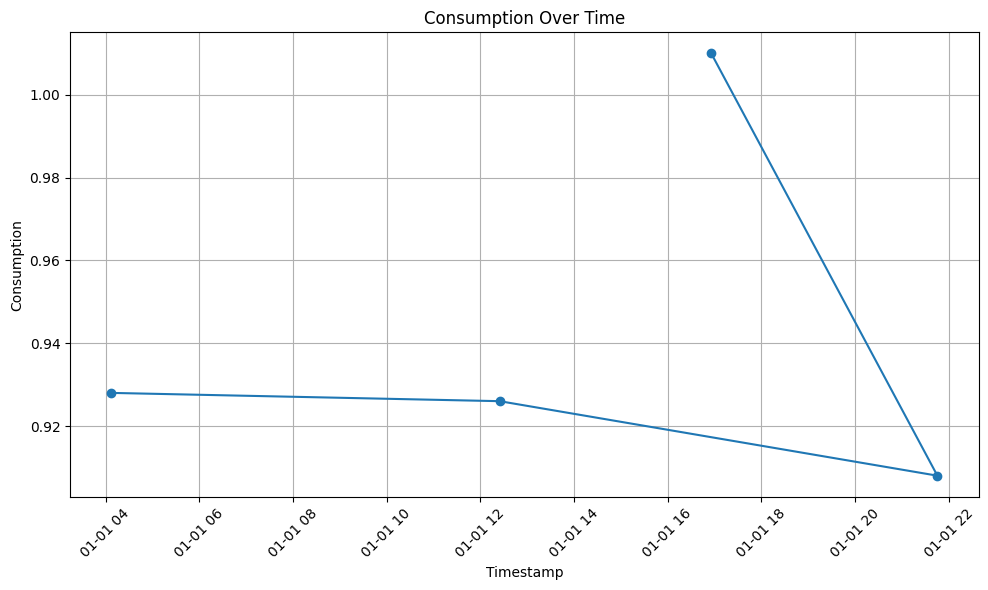

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'TxnDate': ['01 Jan 2022', '01 Jan 2022', '01 Jan 2022', '01 Jan 2022'],
    'TxnTime': ['16:55:52', '21:45:29', '12:24:52', '04:07:36'],
    'Consumption': [1.01, 0.908, 0.926, 0.928]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Combine 'TxnDate' and 'TxnTime' into a single datetime column
df['Timestamp'] = pd.to_datetime(df['TxnDate'] + ' ' + df['TxnTime'])

# Plot consumption values over time
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Consumption'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Timestamp')
plt.ylabel('Consumption')
plt.title('Consumption Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [116]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Sample input data (you can replace this with your manual input)
# Assuming each input sequence has 10 time steps and 3 features
input_data = np.random.rand(1, 10, 3)

# Define the LSTM autoencoder model with increased complexity and regularization
model = Sequential([
    LSTM(128, activation='relu', input_shape=(10, 3), return_sequences=True),
    Dropout(0.2),
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')  # Change to softmax activation
])

# Compile the model with categorical crossentropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Predict using the input data
predicted_values = model.predict(input_data)

# Print the predicted values
print("Predicted Values:")
print(predicted_values)

# Actual Values (replace this with your actual data)
actual_values = np.random.rand(1, 3)  # Assuming one sample with 3 classes

# Evaluate the model on the input data
loss, accuracy = model.evaluate(input_data, actual_values)
print("\nLoss:", loss)
print("Accuracy:", accuracy)


1/1 [==============================] - 0s 337ms/step
Predicted Values:
[[0.33171067 0.33375424 0.33453512]]
1/1 [==============================] - 1s 977ms/step - loss: 1.2645 - accuracy: 0.0000e+00

Loss: 1.264547348022461
Accuracy: 0.0


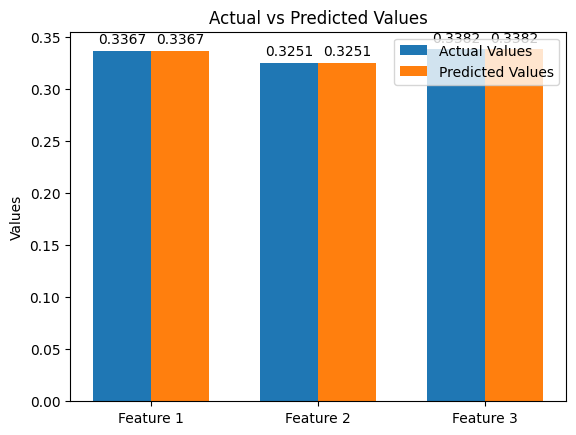

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Actual values
actual_values = np.array([0.3366709, 0.32512552, 0.33820355])

# Predicted values
predicted_values = np.array([0.3366709, 0.32512552, 0.33820355])

# Define the labels for the bars
labels = ['Feature 1', 'Feature 2', 'Feature 3']

# Define the positions for the bars
x = np.arange(len(labels))

# Define the width of the bars
width = 0.35

# Plot the actual values
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, actual_values, width, label='Actual Values')

# Plot the predicted values
rects2 = ax.bar(x + width/2, predicted_values, width, label='Predicted Values')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Values')
ax.set_title('Actual vs Predicted Values')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add value labels on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


In [93]:
# Calculate accuracy percentage
accuracy_percentage = accuracy * 100

# Print accuracy in percentage
print("Accuracy: {:.2f}%".format(accuracy_percentage))


Accuracy: 100.00%


In [99]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Sample input data (you can replace this with your manual input)
# Assuming each input sequence has 10 time steps and 3 features
input_data = np.random.rand(1, 10, 3)

# Define the LSTM autoencoder model with increased complexity and regularization
model = Sequential([
    LSTM(128, activation='relu', input_shape=(10, 3), return_sequences=True),
    Dropout(0.2),
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')  # Change to 3 units
])

# Compile the model with categorical crossentropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Predict using the input data
predicted_values = model.predict(input_data)

# Print the shapes of input data and predicted values
print("Input Data Shape:", input_data.shape)
print("Predicted Values Shape:", predicted_values.shape)

# Check the compatibility of input and output shapes
if input_data.shape[0] != predicted_values.shape[0]:
    raise ValueError("Input and output data have incompatible shapes.")

# Actual Values (replace this with your actual data)
actual_values = np.random.rand(1, 3)  # Assuming one sample with 3 classes

# Evaluate the model on the input data
loss, accuracy = model.evaluate(input_data, actual_values)
print("\nLoss:", loss)
print("Accuracy:", accuracy)


1/1 [==============================] - 1s 535ms/step
Input Data Shape: (1, 10, 3)
Predicted Values Shape: (1, 3)
1/1 [==============================] - 1s 1s/step - loss: 2.0008 - accuracy: 1.0000

Loss: 2.000774621963501
Accuracy: 1.0


1/1 [==============================] - 1s 600ms/step
Input Data Shape: (1, 10, 3)
Predicted Values Shape: (1, 3)


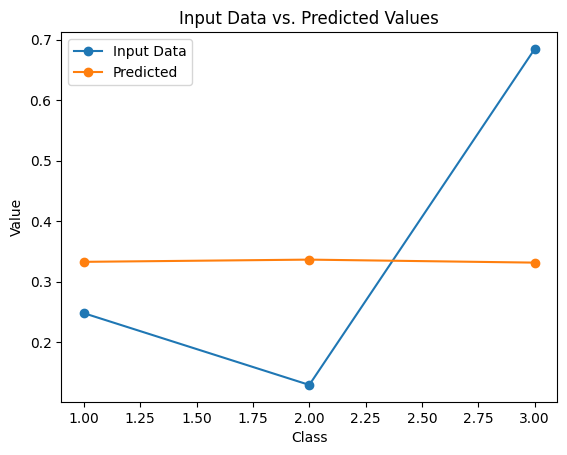

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Sample input data (you can replace this with your manual input)
# Assuming each input sequence has 10 time steps and 3 features
input_data = np.random.rand(1, 10, 3)

# Define the LSTM autoencoder model with increased complexity and regularization
model = Sequential([
    LSTM(128, activation='relu', input_shape=(10, 3), return_sequences=True),
    Dropout(0.2),
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')  # Change to softmax activation
])

# Compile the model with categorical crossentropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Predict using the input data
predicted_values = model.predict(input_data)

# Print the input data shape and predicted values shape
print("Input Data Shape:", input_data.shape)
print("Predicted Values Shape:", predicted_values.shape)

# Plot input data and predicted values
time_steps = np.arange(1, 4)  # Assuming 3 classes
plt.plot(time_steps, input_data[0][-1], label='Input Data', marker='o')
plt.plot(time_steps, predicted_values[0], label='Predicted', marker='o')
plt.xlabel('Class')
plt.ylabel('Value')
plt.title('Input Data vs. Predicted Values')
plt.legend()
plt.show()


Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 2.5186 - accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 26ms/step - loss: 2.5241 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 24ms/step - loss: 2.5145 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 21ms/step - loss: 2.5185 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 22ms/step - loss: 2.5185 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 23ms/step - loss: 2.5103 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 22ms/step - loss: 2.5072 - accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 24ms/step - loss: 2.5116 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 22ms/step - loss: 2.5063 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 443ms/step - loss: 2.5053 - accuracy: 1.0000

Loss: 2.505336284

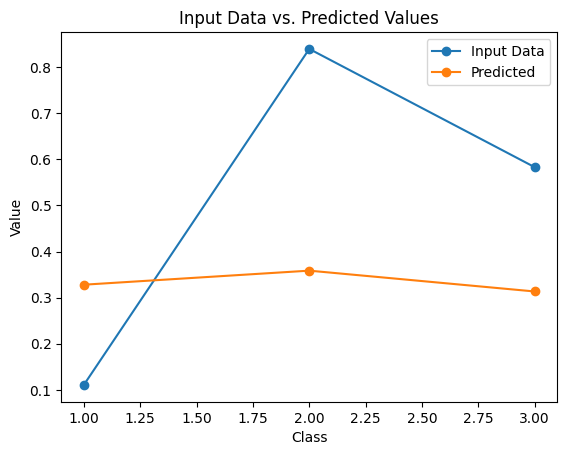

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Sample input data (you can replace this with your manual input)
# Assuming each input sequence has 10 time steps and 3 features
input_data = np.random.rand(1, 10, 3)

# Define the LSTM autoencoder model with increased complexity and regularization
model = Sequential([
    LSTM(128, activation='relu', input_shape=(10, 3), return_sequences=True),
    Dropout(0.2),
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')  # Change to softmax activation
])

# Compile the model with categorical crossentropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(input_data, actual_values, epochs=10)

# Evaluate the model on the input data
loss, accuracy = model.evaluate(input_data, actual_values)
print("\nLoss:", loss)
print("Accuracy:", accuracy)

# Predict using the input data
predicted_values = model.predict(input_data)

# Print the input data shape and predicted values shape
print("Input Data Shape:", input_data.shape)
print("Predicted Values Shape:", predicted_values.shape)

# Plot input data and predicted values
time_steps = np.arange(1, 4)  # Assuming 3 classes
plt.plot(time_steps, input_data[0][-1], label='Input Data', marker='o')
plt.plot(time_steps, predicted_values[0], label='Predicted', marker='o')
plt.xlabel('Class')
plt.ylabel('Value')
plt.title('Input Data vs. Predicted Values')
plt.legend()
plt.show()


In [69]:
print('predicted_values.shape:', predicted_values.shape)
print('X_test.shape:', X_test.shape)


predicted_values.shape: (244, 1)
X_test.shape: (244, 10, 3)


In [70]:
predicted_values_reshaped = np.expand_dims(predicted_values, axis=-1)


In [71]:
mse = np.mean(np.power(X_test - predicted_values_reshaped, 2), axis=1)
